In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./data/ushape.csv', header=None, names=['X', 'Y', 'Class'])
print(df.head())
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values


          X         Y  Class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


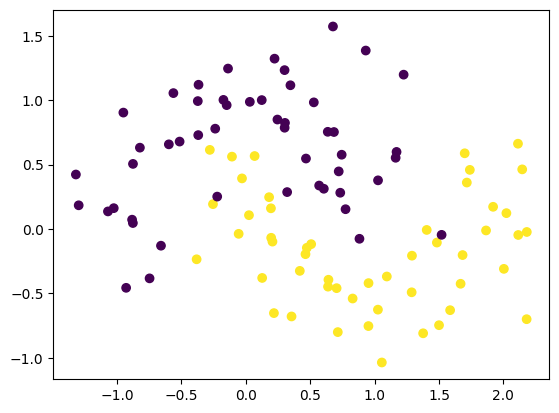

In [11]:
plt.scatter(x[:,0],x[:,1],c=y)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [13]:
clf.fit(x,y)

LogisticRegression()

<Axes: >

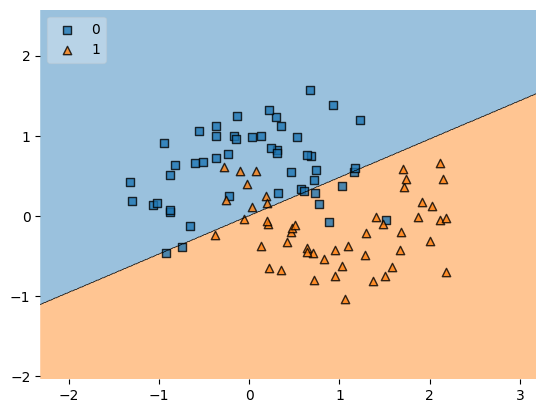

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf,legend=2)

In [19]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

0.8300000000000001

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
x_trf = poly.fit_transform(x)

In [26]:
x[:2]

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397]])

In [25]:
x_trf[:2]

array([[ 3.15949936e-02,  9.86987758e-01,  9.98243623e-04,
         3.11838719e-02,  9.74144834e-01,  3.15395009e-05,
         9.85254235e-04,  3.07780998e-02,  9.61469026e-01],
       [ 2.11509784e+00, -4.62439679e-02,  4.47363887e+00,
        -9.78105167e-02,  2.13850457e-03,  9.46218392e+00,
        -2.06878813e-01,  4.52314640e-03, -9.88929368e-05]])

In [27]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=10))

0.9

In [64]:
def plot_decision_boundary(X,y,degree=1):
    
  poly = PolynomialFeatures(degree=degree)
  X_trf = poly.fit_transform(X)
  
  clf = LogisticRegression(penalty='l2',C = 10)
  clf.fit(X_trf,y)
  
  accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
  
  a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
  b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


  XX,YY=np.meshgrid(a,b)
  
  input_array=np.array([XX.ravel(),YY.ravel()]).T

  labels=clf.predict(poly.transform(input_array))
  
  plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
  plt.scatter(X[:,0],X[:,1], c=y)
  plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

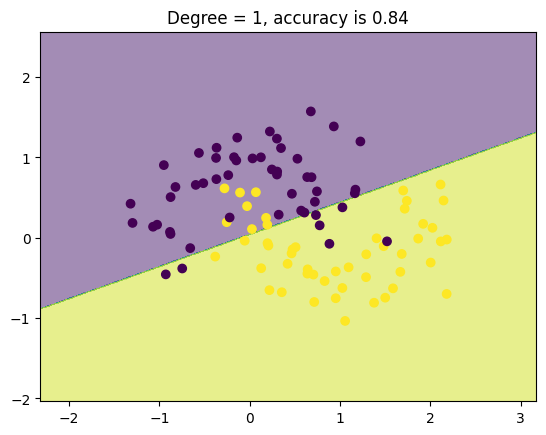

In [65]:
plot_decision_boundary(x,y)


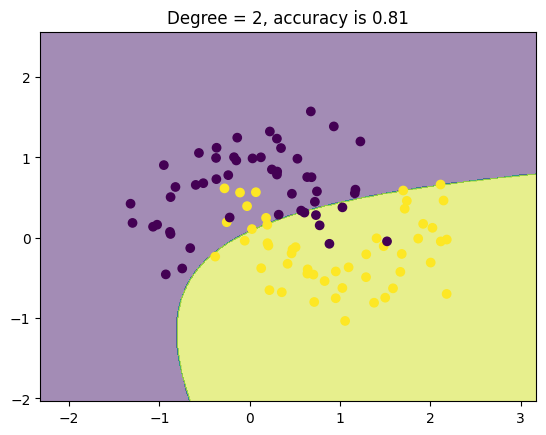

In [66]:
plot_decision_boundary(x,y,degree=2)


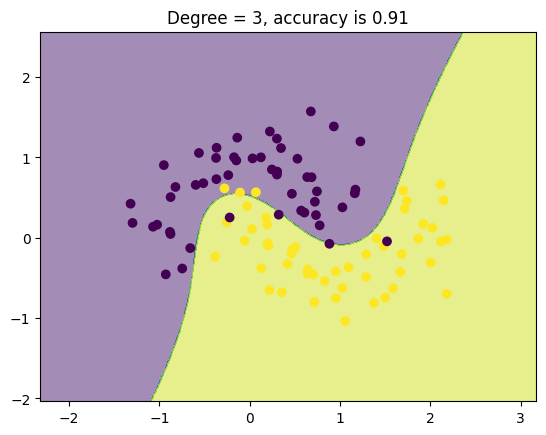

In [67]:
plot_decision_boundary(x,y,degree=3)


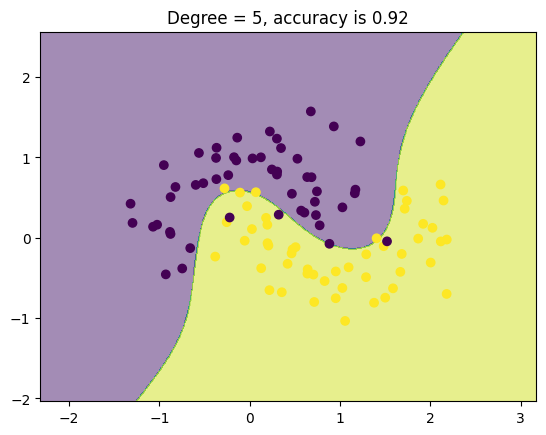

In [74]:
plot_decision_boundary(x,y,degree=5)
